#### Reference :
* https://www.dacon.io/competitions/official/235712/codeshare/2482?page=1&dtype=recent

In [67]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler



import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
x_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bitcoin/train_x_df.csv')
y_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bitcoin/train_y_df.csv')
x_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bitcoin/test_x_df.csv')

train_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [69]:
def df2d_to_array3d(df_2d):
    # 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    print(feature_size, time_size, sample_size)
    sample_index = df_2d.sample_id.value_counts().index
    print(sample_index)
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d

In [70]:
x_train = df2d_to_array3d(x_train_df)
y_train = df2d_to_array3d(y_train_df)
x_test = df2d_to_array3d(x_test_df)

10 1380 7661
Int64Index([7660, 2556, 2544, 2547, 2546, 2549, 2548, 2551, 2550, 2553,
            ...
            5107, 5104, 5105, 5110, 5111, 5108, 5109, 5114, 5115,    0],
           dtype='int64', length=7661)
10 120 7661
Int64Index([2047, 2731, 7338, 5291, 3752, 1705, 5803, 4264, 6313,  170,
            ...
            2901, 4950, 6999, 1364, 3413, 5462, 7511, 1876, 3925,    0],
           dtype='int64', length=7661)
10 1380 535
Int64Index([8188, 7857, 7847, 7846, 7845, 7844, 7851, 7850, 7849, 7848,
            ...
            8035, 8034, 8033, 8032, 8039, 8038, 8037, 8036, 8043, 7683],
           dtype='int64', length=535)


# EDA
* Plot Data Trainset / Targetset

In [71]:
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)

x_train Shape : (7661, 1380, 10)
y_train Shape : (7661, 120, 10)


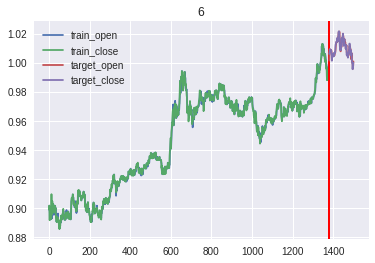

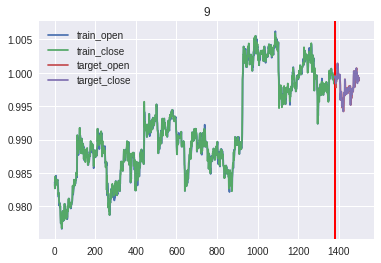

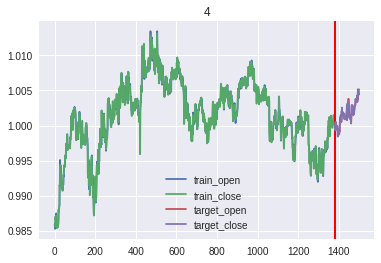

In [72]:
for i in range(3):
    index = np.random.randint(0,100)
    plt.plot(x_train[index,:,1], label='train_open')
    plt.plot(x_train[index,:,4], label='train_close')
    plt.axvline(x=len(x_train[index,:,4]), color='r', linewidth=2)
    plt.plot(np.arange(len(x_train[index,:,1]), len(x_train[index,:,1])+len(y_train[index,:,1])),
             y_train[index,:,1],
             label = 'target_open')
    plt.plot(np.arange(len(x_train[index,:,4]), len(x_train[index,:,4])+len(y_train[index,:,4])),
             y_train[index,:,4],
             label = 'target_close')
    plt.title(int(x_train[index,0,0]))
    plt.legend()

    plt.show()


# Feature Engineering
* Scaler
* Split Dataset Train / Validation / Test

In [73]:
scaler = MinMaxScaler()
normal_cols = ['sample_id',	'time']
scale_cols = ['open',	'close']
train_df_scaled = scaler.fit(x_train_df[scale_cols])

def get_scaler_feature(df):
  df_scaled = scaler.transform(df[scale_cols])
  df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)
  
  open_close_mean = (df_scaled['open'] + df_scaled['close'])/2
  df_open_close_mean = pd.DataFrame(open_close_mean, columns=["feature"])
  final_scaled = pd.concat([df[normal_cols], df_open_close_mean],axis=1)
  return final_scaled

In [75]:
x_train_scaled = get_scaler_feature(x_train_df)
y_train_scaled = get_scaler_feature(y_train_df)
x_test_scaled = get_scaler_feature(x_test_df)

print("x_train_scaled Shape :", x_train_scaled.shape)
x_train_scaled.head()

x_train_scaled Shape : (10572180, 3)


,sample_id,time,feature
0,0,0,0.368004
1,0,1,0.367728
2,0,2,0.367690
3,0,3,0.368261
4,0,4,0.368463


In [76]:
x_train = df2d_to_array3d(x_train_scaled)
y_train = df2d_to_array3d(y_train_scaled)
x_test = df2d_to_array3d(x_train_scaled)

print("x_train Shape :", x_train.shape)

1 1380 7661
Int64Index([7660, 2556, 2544, 2547, 2546, 2549, 2548, 2551, 2550, 2553,
            ...
            5107, 5104, 5105, 5110, 5111, 5108, 5109, 5114, 5115,    0],
           dtype='int64', length=7661)
1 120 7661
Int64Index([2047, 2731, 7338, 5291, 3752, 1705, 5803, 4264, 6313,  170,
            ...
            2901, 4950, 6999, 1364, 3413, 5462, 7511, 1876, 3925,    0],
           dtype='int64', length=7661)
1 1380 7661
Int64Index([7660, 2556, 2544, 2547, 2546, 2549, 2548, 2551, 2550, 2553,
            ...
            5107, 5104, 5105, 5110, 5111, 5108, 5109, 5114, 5115,    0],
           dtype='int64', length=7661)
x_train Shape : (7661, 1380, 1)


# Modeling
* LSTM

In [99]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Model
inputs = keras.Input(shape=(1380, 1))

net = LSTM(512,dropout=0.2,return_sequences=True)(inputs)
net = LSTM(256,dropout=0.2)(net)
net = Dense(128)(net)
net = Dense(120)(net)

outputs = net
model = tf.keras.Model(inputs,outputs)

In [100]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='mae',
              metrics=['mae']
)

In [101]:
history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=128, 
    validation_split = 0.2
)

Epoch 1/10
48/48 [==============================] - 43s 849ms/step - loss: 0.2804 - mae: 0.2804 - val_loss: 0.0499 - val_mae: 0.0499
Epoch 2/10
48/48 [==============================] - 39s 815ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 3/10
48/48 [==============================] - 40s 832ms/step - loss: 0.0492 - mae: 0.0492 - val_loss: 0.0595 - val_mae: 0.0595
Epoch 4/10
48/48 [==============================] - 40s 828ms/step - loss: 0.0421 - mae: 0.0421 - val_loss: 0.0347 - val_mae: 0.0347
Epoch 5/10
48/48 [==============================] - 40s 831ms/step - loss: 0.0367 - mae: 0.0367 - val_loss: 0.0218 - val_mae: 0.0218
Epoch 6/10
48/48 [==============================] - 40s 829ms/step - loss: 0.0304 - mae: 0.0304 - val_loss: 0.0177 - val_mae: 0.0177
Epoch 7/10
48/48 [==============================] - 40s 833ms/step - loss: 0.0253 - mae: 0.0253 - val_loss: 0.0171 - val_mae: 0.0171
Epoch 8/10
48/48 [==============================] - 39s 822ms/step - 

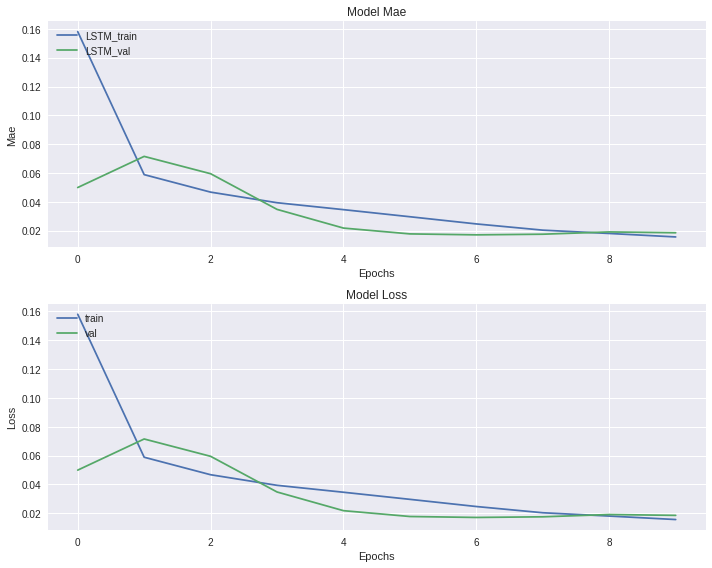

In [102]:
f,ax = plt.subplots(2,1,figsize=(10,8))

ax[0].plot(history.history['mae'])
ax[0].plot(history.history['val_mae'])
ax[0].set_title('Model Mae')
ax[0].set_ylabel('Mae')
ax[0].set_xlabel('Epochs')
ax[0].legend(['LSTM_train', 'LSTM_val'], loc='upper left')


ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['train', 'val'], loc = 'upper left')

f.tight_layout()
plt.show()

In [120]:
preds = model.predict(x_test)

In [123]:
y_train

array([[[0.37732557],
        [0.37733779],
        [0.37727368],
        ...,
        [0.37702981],
        [0.37717531],
        [0.37722163]],

       [[0.37762611],
        [0.377449  ],
        [0.37741961],
        ...,
        [0.37654247],
        [0.37639261],
        [0.37629294]],

       [[0.37661797],
        [0.37595271],
        [0.37514652],
        ...,
        [0.38212259],
        [0.38211934],
        [0.38231435]],

       ...,

       [[0.37798443],
        [0.37851613],
        [0.37823713],
        ...,
        [0.37268498],
        [0.37255655],
        [0.37227297]],

       [[0.37733663],
        [0.37742805],
        [0.377594  ],
        ...,
        [0.37597984],
        [0.3763248 ],
        [0.37668535]],

       [[0.37789341],
        [0.3781953 ],
        [0.37826971],
        ...,
        [0.37867726],
        [0.37854788],
        [0.37851443]]])

In [127]:
preds[0,:,0]

array([0.38665837, 0.3453896 , 0.3578538 , 0.36494505, 0.36001563,
       0.3584211 , 0.35763475, 0.3540123 , 0.3579401 , 0.34887594,
       0.34911788, 0.3577367 , 0.3561147 , 0.3670474 , 0.36131766,
       0.3471392 , 0.36110768, 0.35674933, 0.35224515, 0.35702226,
       0.3634767 , 0.35495147, 0.36037222, 0.35607165, 0.36028624,
       0.3528729 , 0.3595025 , 0.35516965, 0.35770643, 0.3584705 ,
       0.35778987, 0.35711348, 0.35799277, 0.3607007 , 0.36211044,
       0.35253447, 0.36092576, 0.3616416 , 0.3683669 , 0.3601376 ,
       0.35016155, 0.34591666, 0.36621326, 0.35212126, 0.36614168,
       0.3634335 , 0.3650781 , 0.35574177, 0.35731995, 0.36341277,
       0.3666571 , 0.36264217, 0.36234286, 0.36449096, 0.3536874 ,
       0.35875496, 0.3624116 , 0.36413518, 0.3603472 , 0.35772532,
       0.36531335, 0.36350942, 0.36136922, 0.35525322, 0.3599849 ,
       0.35798085, 0.36083913, 0.3546135 , 0.36393896, 0.3567753 ,
       0.36295393, 0.36017644, 0.36130053, 0.36526874, 0.36370

In [124]:
preds=preds.reshape(7661, 120,1)

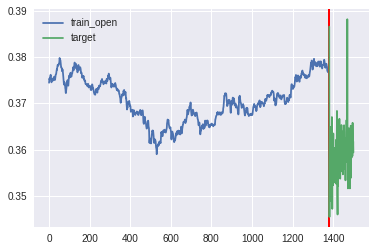

In [119]:
index = 213
plt.plot(x_test[index,:,0], label='train')
plt.axvline(x=len(x_test[index,:,0]), color='r', linewidth=2)

plt.plot(np.arange(len(x_test[index,:,0]), len(x_test[index,:,0])+len(preds[index,:,0])),
        preds[index,:,0],
        label = 'target')
plt.legend()
plt.show()